# 基于随机森林的房价预测
随机森林算法是一种基于决策树的集成学习算法，集成学习通过训练学习出多个估计器，当需要预测时通过结合器将多个估计器的结果整合起来当作最后的结果输出。

本案例是预测加利福利亚州的房价数据集。


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 加载数据集
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [3]:
# 划分训练集80%和测试集20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 创建并训练随机森林回归模型
rf = RandomForestRegressor(
    n_estimators=200,  # 随机森林中树的数量为200个
    max_depth=15,       # 限制树的最大深度为15
    min_samples_split=5,  # 分割内部节点所需的最小样本数
    random_state=42,
    n_jobs=-1          # 使用所有可用的CPU核心
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [5]:
# 预测测试集
y_pred = rf.predict(X_test)
print("预测值y_pred为：\n",y_pred)
print("真实值y_test为：\n",y_test)

预测值y_pred为：
 [0.50996859 0.75697085 4.85241975 ... 4.78284324 0.72394409 1.67255032]
真实值y_test为：
 [0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]


In [6]:
# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"均方误差(MSE): {mse:.4f}")
print(f"决定系数(R²): {r2:.4f}")

均方误差(MSE): 0.2595
决定系数(R²): 0.8020


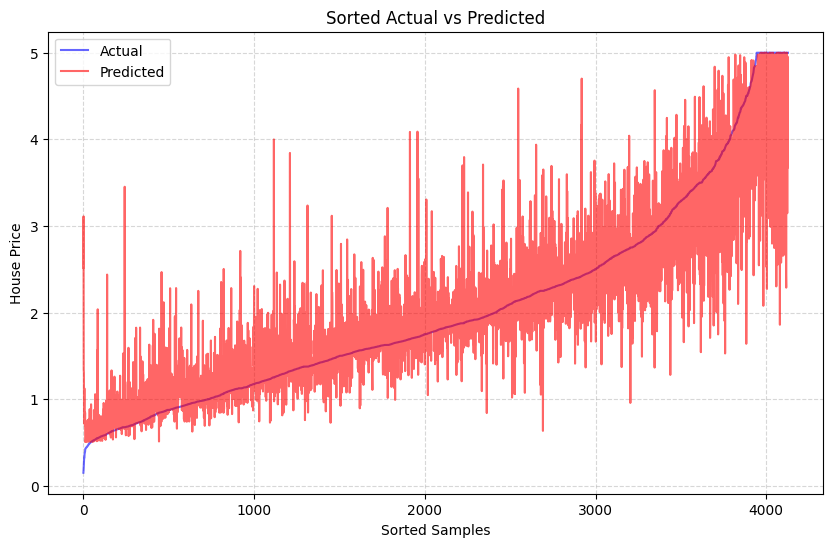

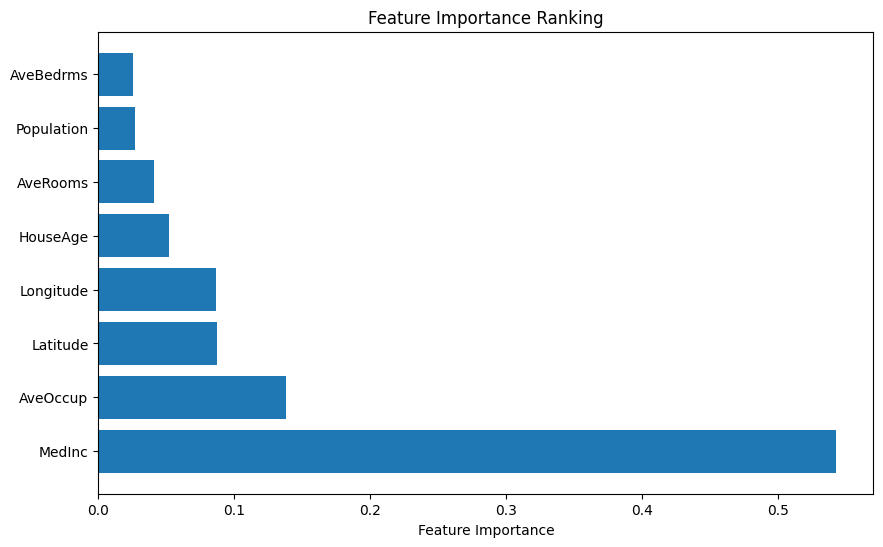

In [11]:
# 2. 排序后的对比折线图（更清晰）
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(y_test)  # 按真实值排序
plt.plot(y_test[sorted_idx], label='Actual', color='blue', alpha=0.6)
plt.plot(y_pred[sorted_idx], label='Predicted', color='red', alpha=0.6)
plt.xlabel('Sorted Samples')
plt.ylabel('House Price')
plt.title('Sorted Actual vs Predicted')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# 3. 特征重要性条形图
plt.figure(figsize=(10, 6))
#从训练好的随机森林模型rf中提取的特征重要性数组。
importances = rf.feature_importances_
#对特征重要性数组进行排序，并返回索引数组，这些索引指向按重要性从高到低排列的特征。
indices = np.argsort(importances)[::-1]
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Ranking')
plt.show()

这个模型训练得感觉还可以，嘿嘿。ヾ(●゜▽゜●)♡